/home/luca/.cache/pypoetry/virtualenvs/adl4cv-OvNqwVNf-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([6, 32, 116])


/tmp/ipykernel_328460/1922497950.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


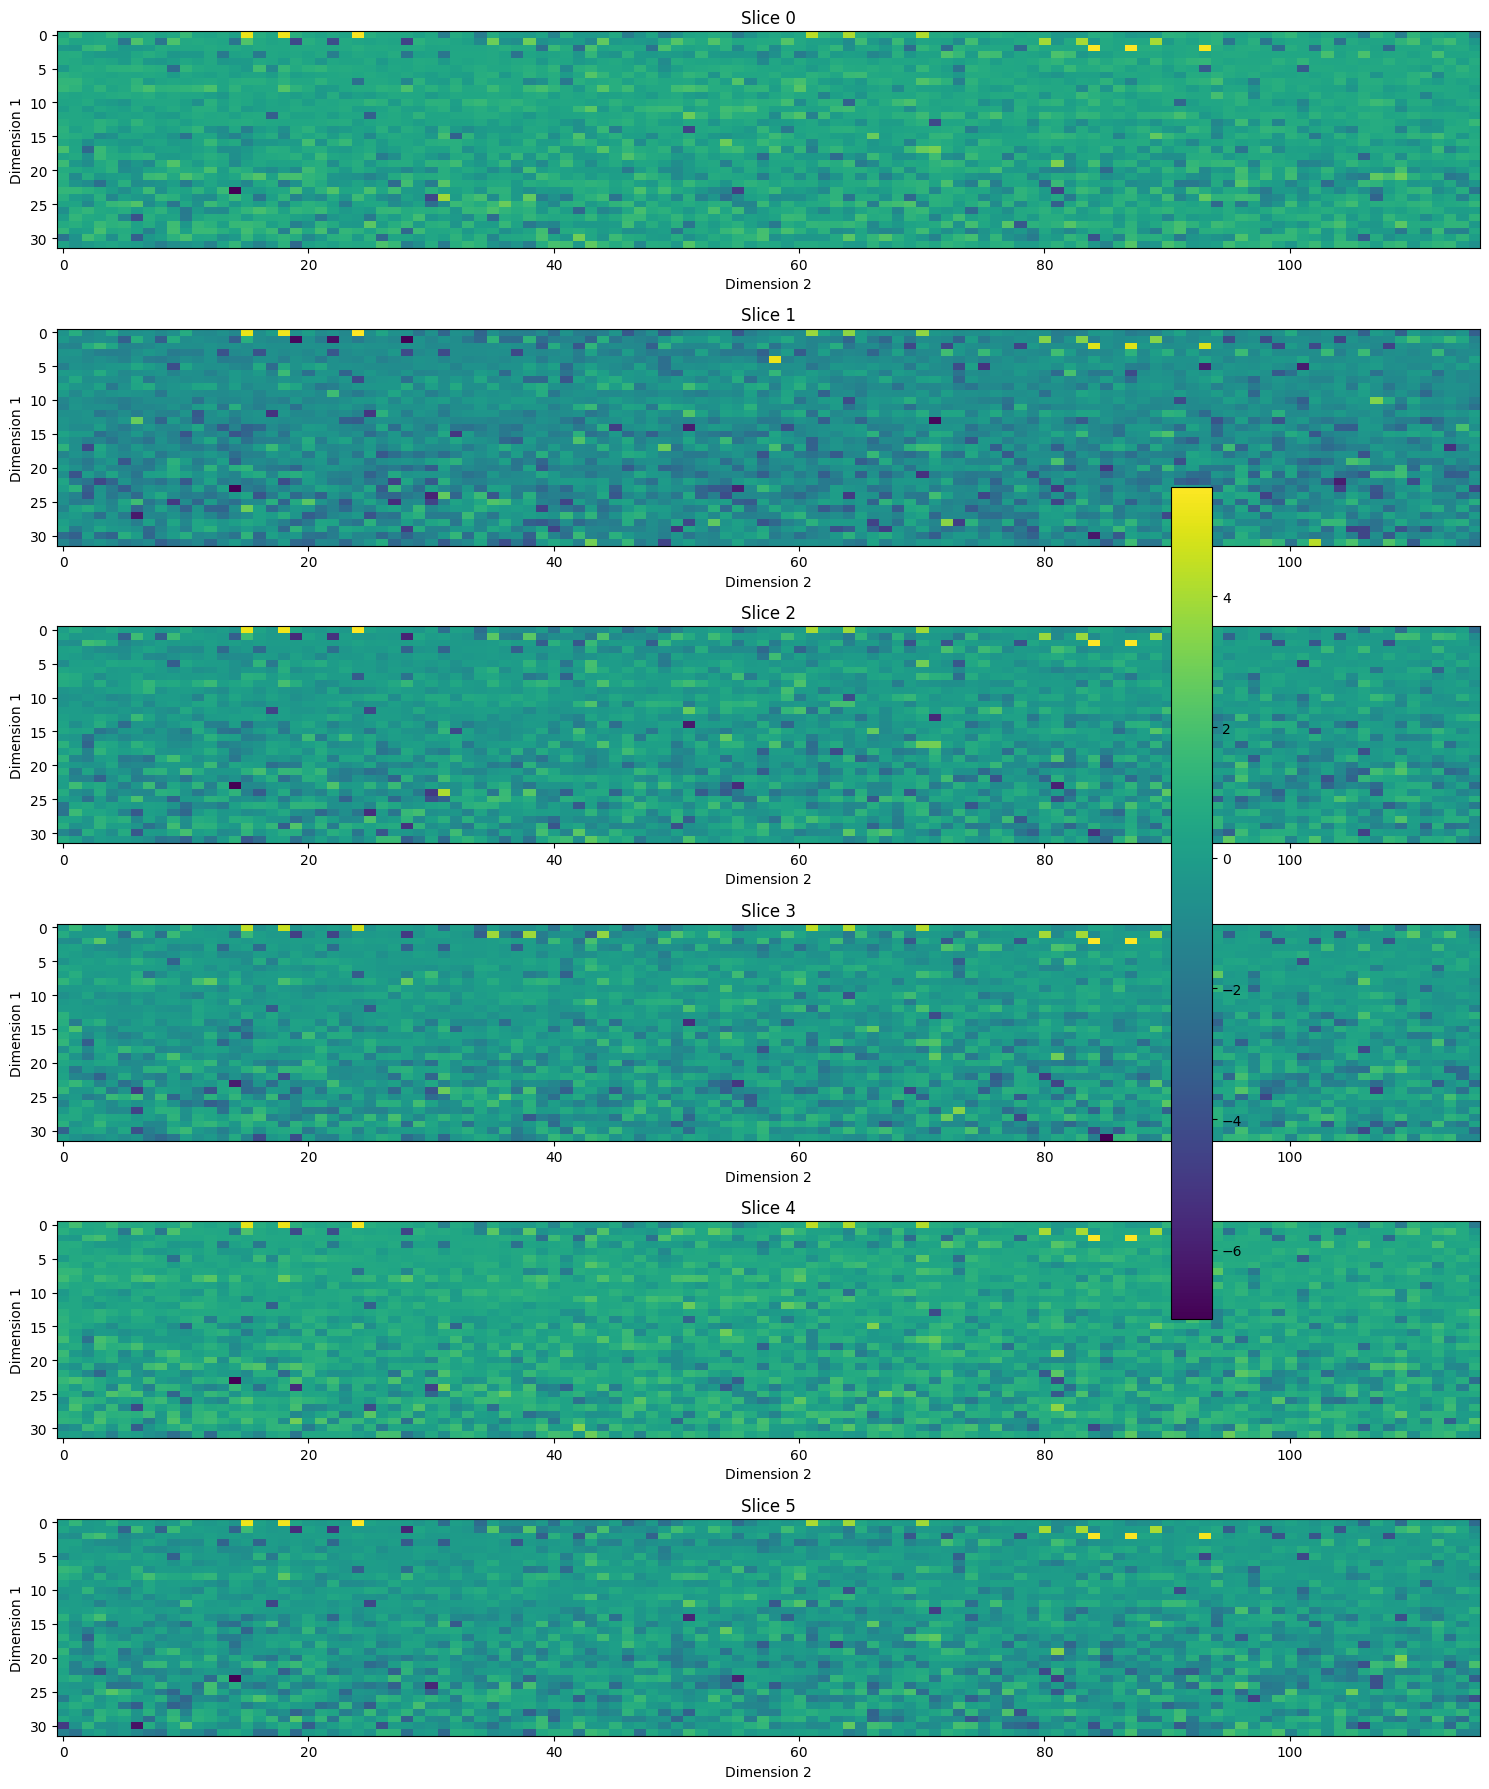

In [2]:
import os

import torch
from data.neural_field_datasets_shapenet import ImageTransform3D, ModelTransform3D, ShapeNetDataset
import matplotlib.pyplot as plt



image_transform = ImageTransform3D()
dataset_pretrained = ShapeNetDataset(os.path.join("./", "datasets", "shapenet_nefs", "pretrained"), transform=image_transform)

dataset_unconditioned = ShapeNetDataset(os.path.join("./", "datasets", "shapenet_nefs", "unconditioned"), transform=image_transform)

dataset = ShapeNetDataset(os.path.join("./", "datasets", "shapenet_nefs", "pretrained"))

model_transform = ModelTransform3D(dataset[0][0]["model_config"])

images = torch.cat([dataset_unconditioned[0][0], torch.cat([dataset_pretrained[i][0] for i in range(5)])])


print(images.shape)


# Convert the tensor to a NumPy array
tensor_np = images.cpu().numpy()

num_slices = tensor_np.shape[0]
fig, axes = plt.subplots(num_slices, 1, figsize=(15, 3 * num_slices))

for i in range(num_slices):
    ax = axes[i]
    slice_to_visualize = tensor_np[i]  # Shape [32, 116]
    im = ax.imshow(slice_to_visualize, aspect='auto', cmap='viridis')
    ax.set_title(f'Slice {i}')
    ax.set_xlabel('Dimension 2')
    ax.set_ylabel('Dimension 1')

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
plt.tight_layout()
plt.show()

torch.return_types.sort(
values=tensor([ 609.1764,  780.8080,  867.6176,  887.9777,  978.9917,  979.8552,
         994.3522,  997.1914, 1014.4043, 1081.3116, 1089.6482, 1115.8188,
        1212.6302, 1245.6531, 1292.4380, 1416.3347, 1458.8523, 1493.3187,
        1513.9802, 1531.1953]),
indices=tensor([15, 16,  1, 12,  4, 17, 14,  3, 19, 10,  6,  9,  5,  7,  2, 18,  8, 11,
         0, 13]))


/tmp/ipykernel_304358/2000048598.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


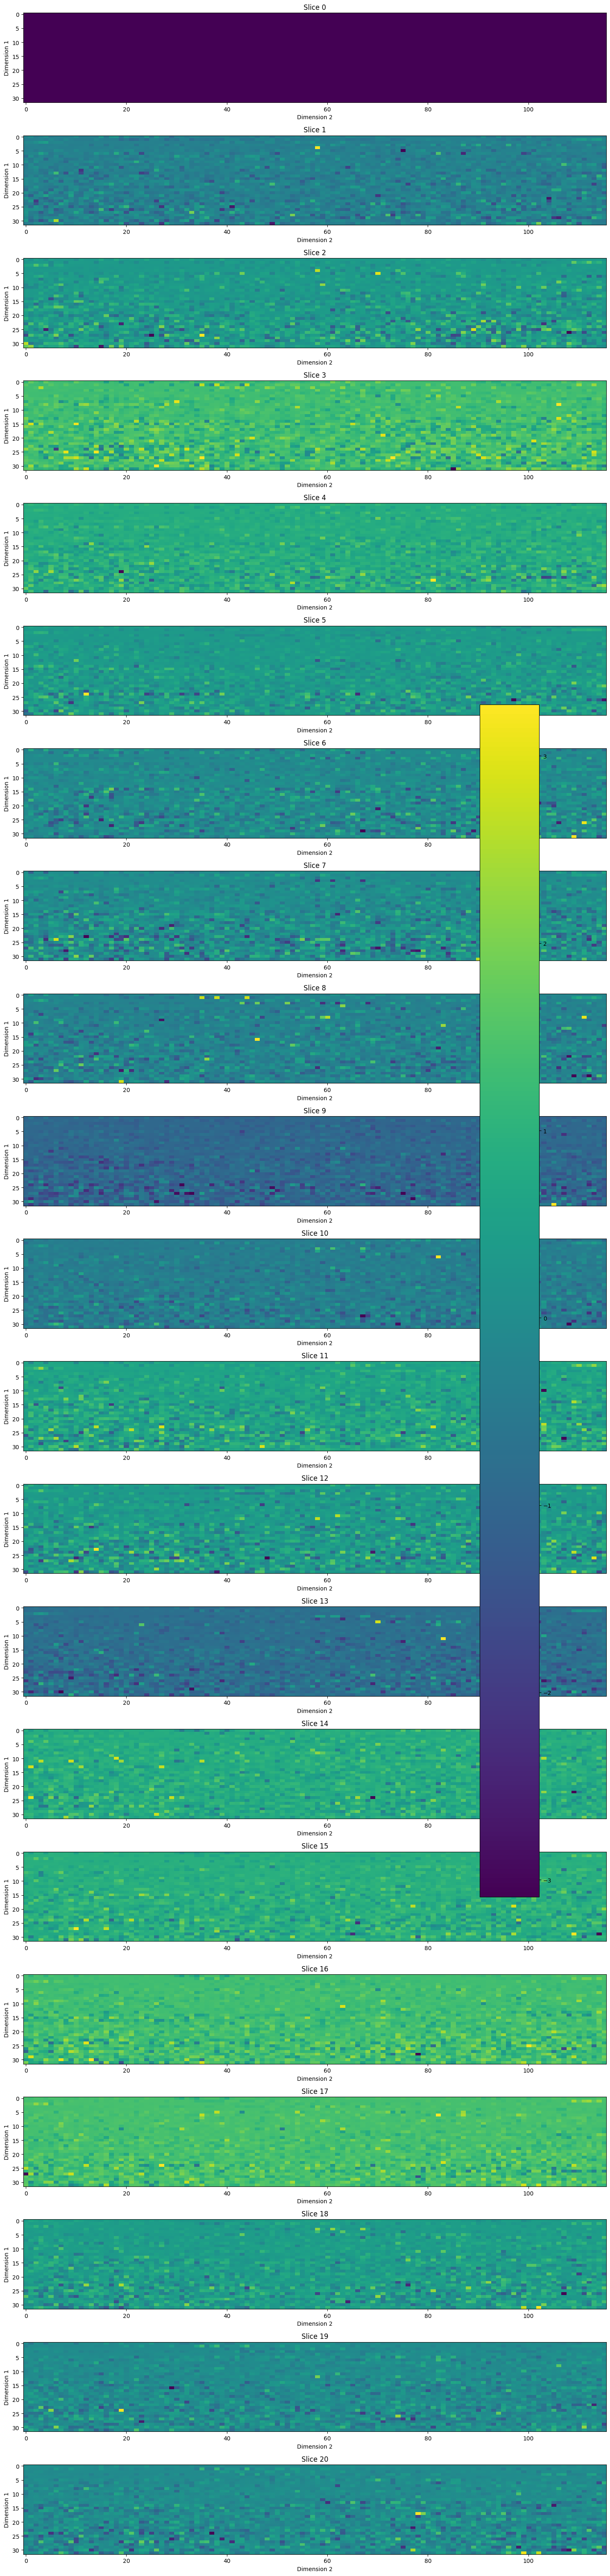

In [9]:
import os

import torch
from data.neural_field_datasets_shapenet import ImageTransform3D, ModelTransform3D, ShapeNetDataset
import matplotlib.pyplot as plt



image_transform = ImageTransform3D()
dataset_pretrained = ShapeNetDataset(os.path.join("./", "datasets", "shapenet_nefs", "pretrained"), transform=image_transform)

dataset_unconditioned = ShapeNetDataset(os.path.join("./", "datasets", "shapenet_nefs", "unconditioned"), transform=image_transform)

dataset = ShapeNetDataset(os.path.join("./", "datasets", "shapenet_nefs", "pretrained"))

model_transform = ModelTransform3D(dataset[0][0]["model_config"])

images = torch.cat([dataset_unconditioned[0][0], torch.cat([dataset_pretrained[i][0] for i in range(20)])])

images_diff = (images - images[0]).cpu()

print(images_diff[1:].abs().sum(dim=2).sum(dim=1).sort())


# Convert the tensor to a NumPy array
tensor_np = images_diff.numpy()

num_slices = tensor_np.shape[0]
fig, axes = plt.subplots(num_slices, 1, figsize=(15, 3 * num_slices))

for i in range(num_slices):
    ax = axes[i]
    slice_to_visualize = tensor_np[i]  # Shape [32, 116]
    im = ax.imshow(slice_to_visualize, aspect='auto', cmap='viridis')
    ax.set_title(f'Slice {i}')
    ax.set_xlabel('Dimension 2')
    ax.set_ylabel('Dimension 1')

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
plt.tight_layout()
plt.show()

In [47]:
images = torch.cat([dataset_pretrained[i][0] for i in range(3000)])
images_diff = (images - dataset_unconditioned[0][0]).cpu()
values, indices = images_diff.abs().sum(dim=2).sum(dim=1).sort()
lowest_indices = indices[:20]
highest_indices = indices[-500:]

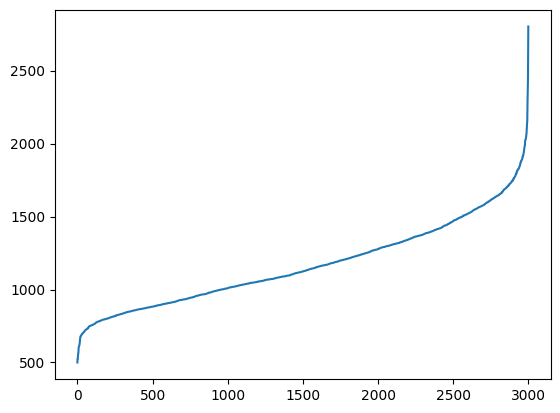

In [48]:
plt.plot(values)

In [58]:
torch.load(file, map_location="cpu")['state_dict']

OrderedDict([('layers.0.weight',
              tensor([[ 9.6219e-02,  1.3811e+00, -1.9732e-01, -6.9001e-02,  1.0589e+00,
                        8.9548e-03,  9.7335e-03,  1.4444e-01, -2.9254e-01, -7.8271e-02,
                        1.3129e+00, -1.4976e-01, -2.6006e-01,  3.3214e-02, -4.0698e-01],
                      [ 4.7729e+00,  5.4546e-01, -9.6323e-02,  4.8864e+00,  6.5451e-01,
                       -9.2127e-02, -2.6462e-01,  2.5822e-02, -2.1051e-01,  5.1086e+00,
                        5.8244e-01,  8.6594e-02,  3.6606e-02, -8.5568e-03, -3.2148e-01],
                      [ 1.6939e-01, -2.3355e+00,  2.6957e-02, -6.1985e-04, -2.3695e+00,
                        2.4956e-02, -7.3711e-01, -7.5510e-01, -8.4068e-01, -1.0048e-01,
                       -2.0341e+00,  1.6905e-01, -9.1230e-01, -9.5368e-01, -7.8192e-01],
                      [ 4.2089e-02, -2.6862e+00, -9.6380e-01, -2.5075e-01, -2.5595e+00,
                       -9.7190e-01, -1.6507e-01, -5.8480e-02,  2.7791e-01,  5.8328e-

In [9]:
from os.path import join

idx = highest_indices[0]
print(file)
file = join(dataset_pretrained.mlps_folder, dataset_pretrained.mlp_files[idx])



model_dict_reconstructed = image_transform.inverse(image_transform(torch.load(file, map_location="cpu")['state_dict'], "plane")[0])

model_reconstructed = model_transform(model_dict_reconstructed)[0]

# First original
mesh, sdf = model_to_mesh(model_reconstructed, res=256)
mesh.show()

NameError: name 'highest_indices' is not defined

In [10]:
from utils.visualization3d import model_to_mesh


idx = highest_indices[]
model_dict_reconstructed = image_transform.inverse(images[idx])

model_reconstructed = model_transform(model_dict_reconstructed)[0]

# First original
mesh, sdf = model_to_mesh(model_reconstructed, res=256)
mesh.show()


SyntaxError: invalid syntax (2576168575.py, line 4)

nef-5d7c2f1b6ed0d02aa4684be4f9cb3c1d_model_final.pth


/tmp/ipykernel_328460/363900145.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


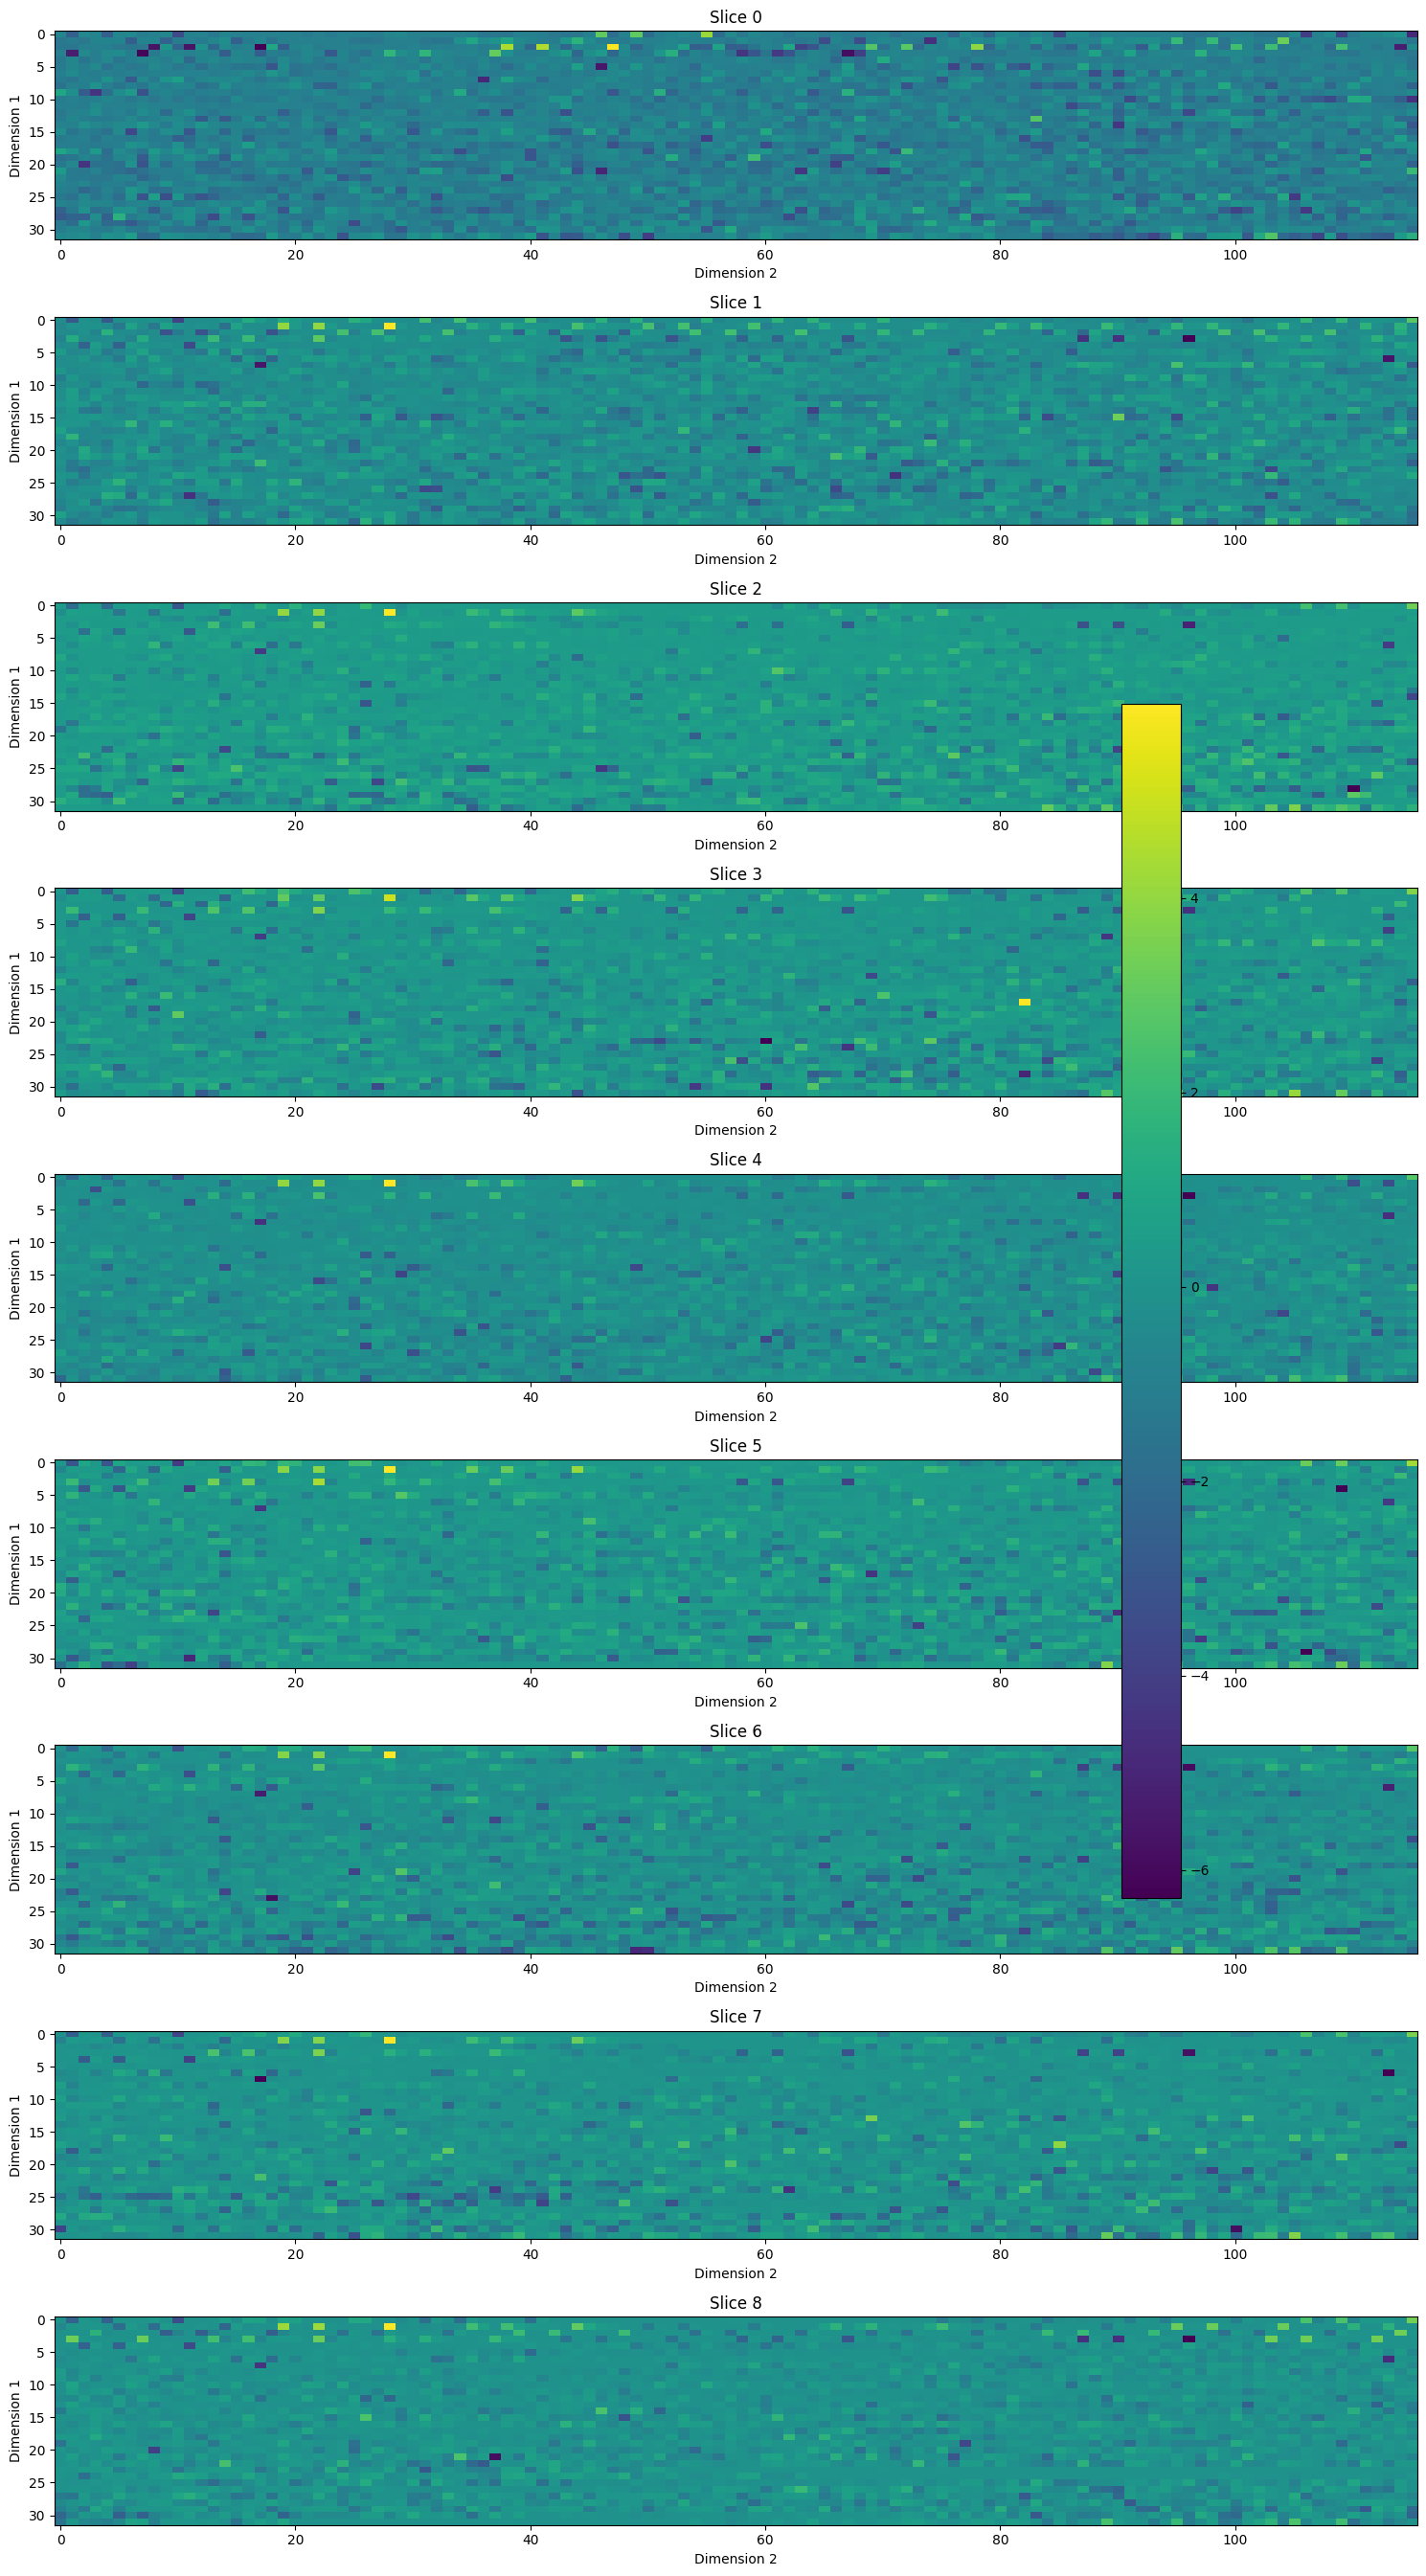

In [21]:
import os

import torch
from data.neural_field_datasets_shapenet import ImageTransform3D, ModelTransform3D, ShapeNetDataset
import matplotlib.pyplot as plt



image_transform = ImageTransform3D()

dataset_unconditioned = ShapeNetDataset(os.path.join("./", "datasets", "shapenet_nef_2", "unconditioned"), transform=image_transform)
dataset_pretrained = ShapeNetDataset(os.path.join("./", "datasets", "shapenet_nef_2", "pretrained"), transform=image_transform)
print(dataset_unconditioned.mlp_files[0])

dataset = ShapeNetDataset(os.path.join("./", "datasets", "shapenet_nef_2", "unconditioned"))

model_transform = ModelTransform3D(dataset[0][0]["model_config"])

images_pretrained = torch.cat([dataset_pretrained[i][0] for i in range(len(dataset_pretrained))]).cpu()
images = torch.cat([dataset_unconditioned[0][0].cpu(), images_pretrained])



# Convert the tensor to a NumPy array
tensor_np = images.numpy()

num_slices = tensor_np.shape[0]
fig, axes = plt.subplots(num_slices, 1, figsize=(15, 3 * num_slices))

for i in range(num_slices):
    ax = axes[i]
    slice_to_visualize = tensor_np[i]  # Shape [32, 116]
    im = ax.imshow(slice_to_visualize, aspect='auto', cmap='viridis')
    ax.set_title(f'Slice {i}')
    ax.set_xlabel('Dimension 2')
    ax.set_ylabel('Dimension 1')

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
plt.tight_layout()
plt.show()

In [22]:
dataset_unconditioned[0][0].mean(), dataset_unconditioned[0][0].std()

(tensor(-0.0360, device='cuda:0'), tensor(0.4648, device='cuda:0'))

In [23]:
dataset_unconditioned[1][0].mean(), dataset_unconditioned[1][0].std()

(tensor(-0.1053, device='cuda:0'), tensor(0.7404, device='cuda:0'))

In [20]:
from utils.visualization3d import model_to_mesh


model_dict_reconstructed = image_transform.inverse(images[0])

model_reconstructed = model_transform(model_dict_reconstructed)[0]

# First original
mesh, sdf = model_to_mesh(model_reconstructed, res=256)
mesh.show()


In [19]:
from utils.visualization3d import model_to_mesh


model_dict_reconstructed = image_transform.inverse(images_pretrained[2])

model_reconstructed = model_transform(model_dict_reconstructed)[0]

# First original
mesh, sdf = model_to_mesh(model_reconstructed, res=256)
mesh.show()


In [4]:
import os

import torch
from data.neural_field_datasets_shapenet import ImageTransform3D, ModelTransform3D, ShapeNetDataset
import matplotlib.pyplot as plt



image_transform = ImageTransform3D()
dataset_pretrained_old = ShapeNetDataset(os.path.join("./", "datasets", "shapenet_nefs", "pretrained"), transform=image_transform)
dataset_unconditioned_old = ShapeNetDataset(os.path.join("./", "datasets", "shapenet_nefs", "unconditioned"), transform=image_transform)

dataset_pretrained_new = ShapeNetDataset(os.path.join("./", "datasets", "shapenet_nef_2", "pretrained"), transform=image_transform)
dataset_unconditioned_new = ShapeNetDataset(os.path.join("./", "datasets", "shapenet_nef_2", "unconditioned"), transform=image_transform)

dataset = ShapeNetDataset(os.path.join("./", "datasets", "shapenet_nefs", "pretrained"))
model_transform = ModelTransform3D(dataset[0][0]["model_config"])

images_old = torch.cat([dataset_pretrained_old[i][0] for i in range(len(dataset_pretrained_old))])
image_old_diff = images_old - dataset_unconditioned_old[0][0]

images_new = torch.cat([dataset_pretrained_new[i][0] for i in range(len(dataset_pretrained_new))])
image_new_diff = images_new - dataset_unconditioned_new[0][0]

In [5]:
image_old_diff.abs().mean(dim=2).mean(dim=1).sort()

torch.return_types.sort(
values=tensor([0.1347, 0.1409, 0.1410,  ..., 0.6613, 0.7033, 0.7550], device='cuda:0'),
indices=tensor([ 773,  228,  901,  ..., 1293, 2437,  309], device='cuda:0'))

In [6]:
image_new_diff.abs().mean(dim=2).mean(dim=1).sort()

torch.return_types.sort(
values=tensor([0.0645, 0.0654, 0.0660,  ..., 0.3983, 0.4120, 0.4438], device='cuda:0'),
indices=tensor([ 351, 1177,  485,  ...,  258,  983,  576], device='cuda:0'))

In [ ]:
indices_old = image_old_diff.abs().mean(dim=2).mean(dim=1).sort().indices
image_new_diff.abs().mean(dim=2).mean(dim=1).sort()
indices_new = .indices

In [8]:
# Convert the tensor to a NumPy array
tensor_np = image_old_diff[].cpu().numpy()

num_slices = tensor_np.shape[0]
fig, axes = plt.subplots(num_slices, 1, figsize=(15, 3 * num_slices))

for i in range(num_slices):
    ax = axes[i]
    slice_to_visualize = tensor_np[i]  # Shape [32, 116]
    im = ax.imshow(slice_to_visualize, aspect='auto', cmap='viridis')
    ax.set_title(f'Slice {i}')
    ax.set_xlabel('Dimension 2')
    ax.set_ylabel('Dimension 1')

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f54291ffeb0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x1044600 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1500x1044600 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x1.0446e+06 with 618 Axes>